In [6]:
from pydens import Solver, NumpySampler
import numpy as np
import torch

from pydens import Solver, D, V, ConvBlockModel
from pydens import NumpySampler as NS


In [ ]:
def plot_approximation_2d(approximation):
    plt.imshow(approximation)
    plt.colorbar()
    plt.title(r'$\hat{f}(x, y)$', fontsize=16)
    plt.xlabel(r'$x$', fontsize=16)
    plt.ylabel(r'$y$', fontsize=16)


$$V_{t} + rsV_{s} -rV + \frac{\sigma^{2}s^{2}V_{ss}}{2} = 0$$

$$V_{\tau} + \frac{V_{ss}\sigma^{2}s^{2}}{2}$$

$$-V_{\tau} + \frac{V_{ss}y}{2} + \kappa(\bar{v} - y) V_{y} + V_{sy} \rho \nu yx + \frac{V_{yy} y\nu^{2}}{2}$$

+ https://github.com/analysiscenter/pydens

In [102]:
# def pde(f, x, t, sigma):
#     return 0.5 * D(D(f, x), x) * (sigma ** 2) * (x ** 2) - D(f, t)


def pde(f, x, y, t, kappa, vbar, rho, nu):
    return (0.5 * D(D(f, x), x) * y * (x ** 2) +
            0.5 * D(D(f, y), y) * (nu ** 2) * y + 
            kappa * (vbar - y) * D(f, y) + 
            D(D(f, x), y) * rho * nu * y * x + 
            - D(f, t))


#

solver = Solver(pde, ndims=3, nparams=4,
                initial_condition=lambda x, y: 0.5 * (torch.sign(x - torch.tensor(1.0))  + 1),
                boundary_condition=0, layout='fafa', units=[10, 1], activation='sigmoid')

solver.fit(niters=2000, batch_size=1500, lr=0.005)



100%|███████████████████████████████████████| 2000/2000 [00:34<00:00, 58.55it/s]


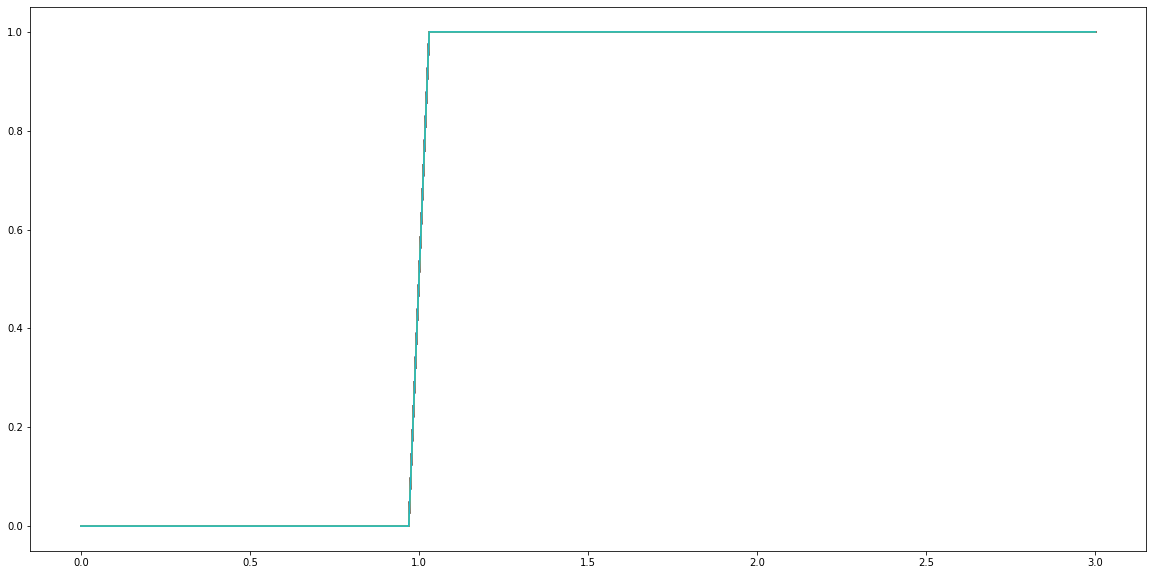

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
xs = np.linspace(0, 3, 100)
for t in np.linspace(0, 10, 100):
    plt.plot(xs, solver.predict(xs, 0.002, t, 10, 1000, 0, 0), label=f"{t}")
# plt.plot(xs, np.maximum(xs - 1.0, 0))

https://deepxde.readthedocs.io/en/latest/demos/pinn_forward/diffusion.1d.exactBC.html

PYDENS: A PYTHON-FRAMEWORK FOR SOLVING
DIFFERENTIAL EQUATIONS WITH NEURAL NETWORKS

+ https://github.com/alialaradi/DeepGalerkinMethod
+ https://github.com/atapritchard/DPDEs
+ https://github.com/Plemeur/pre_stage
+ https://github.com/Plemeur/DGM
+ Deep Learning of High-Dimensional Partial Differential Equations https://github.com/pooyasf/DGM
+ https://github.com/junbinhuang/DeepRitz
+ https://github.com/alialaradi/DeepGalerkinMethod
